In [49]:
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
import numpy as np
import scipy.linalg as la

In [50]:
wr_df = pd.read_parquet('worldrecords.parquet')

In [51]:
# split the dataframe
wr_150_df = wr_df[wr_df.cc == 150]
wr_200_df = wr_df[wr_df.cc == 200]

# extract the two variables
X = wr_150_df.time.values.reshape((-1,1))
y = wr_200_df.time.values.reshape((-1,1))

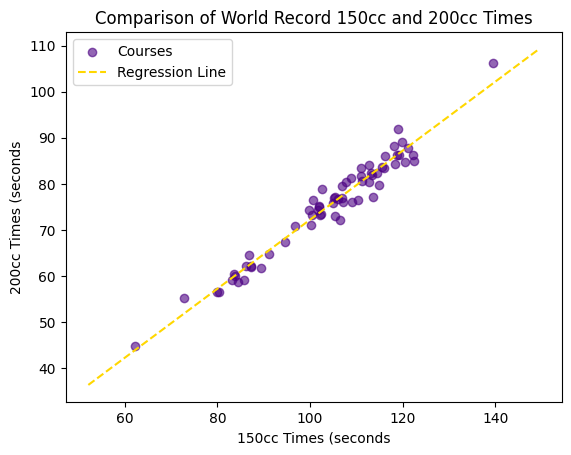

In [52]:
# fit with linear regression
reg = linear_model.LinearRegression()
reg.fit(X,y)

# extract the line of best fit y=mx+b
m = reg.coef_[0][0]
b = reg.intercept_[0]

domain = np.linspace(np.min(X)-10,np.max(X)+10)

plt.scatter(X,y, label='Courses', color = 'indigo', alpha=.6)
plt.plot(domain, m*domain+b, '--', label='Regression Line', color='gold')
plt.xlabel('150cc Times (seconds')
plt.ylabel('200cc Times (seconds')
plt.title('Comparison of World Record 150cc and 200cc Times')
plt.legend()
plt.savefig('mario_regression.png')




In [53]:
slim_200 = wr_200_df[['track','time']]
slim_200 = slim_200.rename(columns = {
    'time':'time_200'
})
slim_150 = wr_150_df[['track','time']]
slim_150 = slim_150.rename(columns = {
    'time':'time_150'
})

times_df = pd.merge(slim_150,slim_200, on='track', how = 'inner')
times_df

,track,time_150,time_200
0,Mario Kart Stadium,94.712,67.363
1,Water Park,100.184,70.979
2,Sweet Sweet Canyon,108.845,81.330
3,Thwomp Ruins,108.975,76.172
4,Mario Circuit,105.331,72.925
...,...,...,...
59,DS Waluigi Pinball,139.495,106.169
60,Tour Sydney Sprint,120.551,84.801
61,GBA Snow Land,86.881,64.681
62,Wii Mushroom Gorge,87.337,62.121


In [54]:
def above_line(time_150,time_200):
    return time_200 > m*time_150+b
def above_line_df(row):
    return above_line(row.time_150, row.time_200)
def distance_from_line_df(row):
    return la.norm(row.time_200-m*row.time_150+b)

times_df['above_regression_line']=times_df.apply(above_line_df,axis=1)
times_df['distance_from_line'] = times_df.apply(distance_from_line_df,axis=1)
times_df['difference_from_line'] = times_df.distance_from_line * (times_df.above_regression_line*1-.5)*2
times_df

,track,time_150,time_200,above_regression_line,distance_from_line,difference_from_line
0,Mario Kart Stadium,94.712,67.363,False,6.160476,-6.160476
1,Water Park,100.184,70.979,False,6.640319,-6.640319
2,Sweet Sweet Canyon,108.845,81.330,True,2.772158,2.772158
3,Thwomp Ruins,108.975,76.172,False,8.027464,-8.027464
4,Mario Circuit,105.331,72.925,False,8.546896,-8.546896
...,...,...,...,...,...,...
59,DS Waluigi Pinball,139.495,106.169,True,0.874970,0.874970
60,Tour Sydney Sprint,120.551,84.801,False,8.063209,-8.063209
61,GBA Snow Land,86.881,64.681,True,2.980899,2.980899
62,Wii Mushroom Gorge,87.337,62.121,False,5.882219,-5.882219


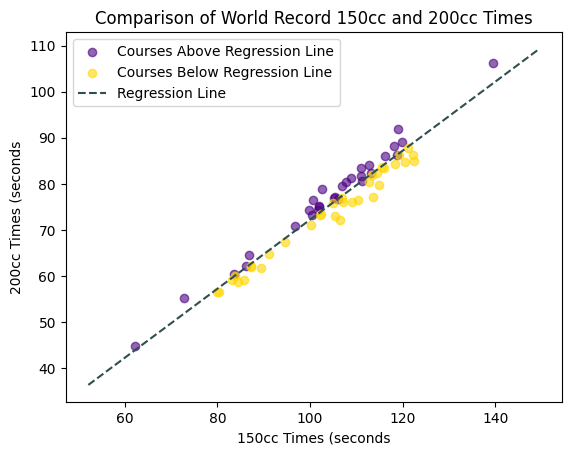

In [55]:
above_X = times_df[times_df.above_regression_line].time_150.values
above_Y = times_df[times_df.above_regression_line].time_200.values
below_X = times_df[~times_df.above_regression_line].time_150.values
below_Y = times_df[~times_df.above_regression_line].time_200.values
plt.scatter(above_X,above_Y, alpha = .6, label='Courses Above Regression Line', color='indigo')
plt.scatter(below_X,below_Y, alpha=.6, label='Courses Below Regression Line', color='gold')
plt.plot(domain, m*domain+b, '--', label='Regression Line', color='darkslategray')
plt.xlabel('150cc Times (seconds')
plt.ylabel('200cc Times (seconds')
plt.title('Comparison of World Record 150cc and 200cc Times')
plt.legend()
plt.savefig('mario_regression_separated.png')
